<a href="https://colab.research.google.com/github/SRIKARACHARYA/MINI_PROJECT_WATER-_QUALITY_ANALYSIS/blob/main/MINI_PROJECT_WATER_QUALITY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MINI PROJECT -- WATER QUALITY ANALYSIS

##RAW DATASET : https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv
##Download Dataset : https://www.kaggle.com/code/kanncaa1/water-quality-explanatory-data-analysis/data?select=water_potability.csv

    Context :
    * Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

    Content :
    * The water_potability.csv file contains water quality metrics for 3276 different water bodies.

    1.pH value : PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

    2.Hardness : Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

    3.Solids (Total dissolved solids - TDS) : Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

    4.Chloramines : Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

    5.Sulfate : Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

    6.Conductivity : Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

    7.Organic_carbon:
    Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

    8.Trihalomethanes : THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

    9.Turbidity : The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

    10.Potability : Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

#Importing The Libraries

In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Importing The Dataset

In [96]:
df_water = pd.read_csv("/content/drive/MyDrive/MINOR PROJECT/water_potability.csv")

In [97]:
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [98]:
df_water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


# Exploratory Data Analysis (DE, DC, DM, DV)

In [99]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [100]:
df_water.shape

(3276, 10)

In [101]:
df_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [102]:
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [103]:
print(f'{df_water.ph.isnull().sum()}:{df_water.ph.notnull().sum()}')

print(df_water.ph.isnull().sum(),":",df_water.ph.notnull().sum())

491:2785
491 : 2785


In [104]:
df_water[df_water['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [105]:
df_water.ph.describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [106]:
df_water['ph'].fillna(df_water.ph.mean(),inplace=True)

In [107]:
df_water.ph.isnull().sum()

0

In [108]:
print(f'{df_water.Sulfate.isnull().sum()}:{df_water.Sulfate.notnull().sum()}')

781:2495


In [109]:
df_water[df_water['Sulfate'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [110]:
df_water.Sulfate.describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

In [111]:
df_water['Sulfate'].fillna(df_water.Sulfate.mean(),inplace=True)

In [112]:
df_water.Sulfate.isnull().sum()

0

In [113]:
print(f'{df_water.Trihalomethanes.isnull().sum()}:{df_water.Trihalomethanes.notnull().sum()}')

162:3114


In [114]:
df_water[df_water['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,7.080795,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,333.775777,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,333.775777,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [115]:
df_water.Trihalomethanes.describe()

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64

In [116]:
df_water['Trihalomethanes'].fillna(df_water.Trihalomethanes.mean(),inplace=True)

In [117]:
df_water.Trihalomethanes.isnull().sum()

0

In [118]:
df_water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [119]:
d = pd.DataFrame(df_water["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

In [120]:
df_water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


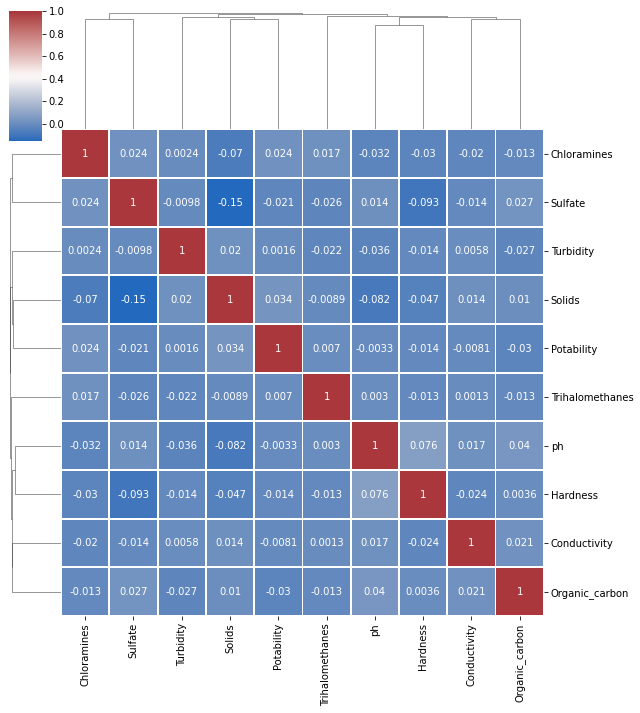

In [121]:
sns.clustermap(df_water.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

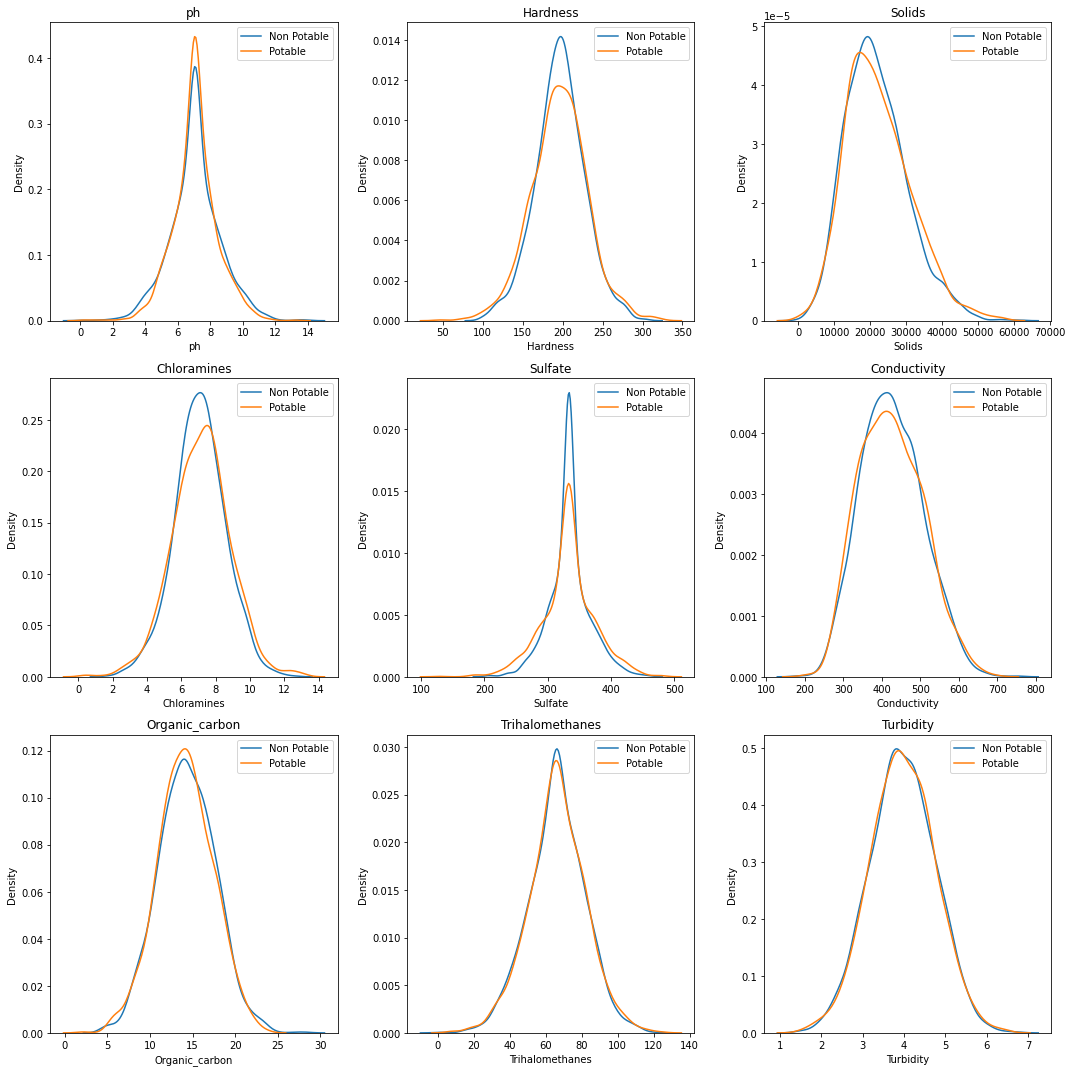

In [122]:
non_potable = df_water.query("Potability == 0")
potable = df_water.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df_water.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

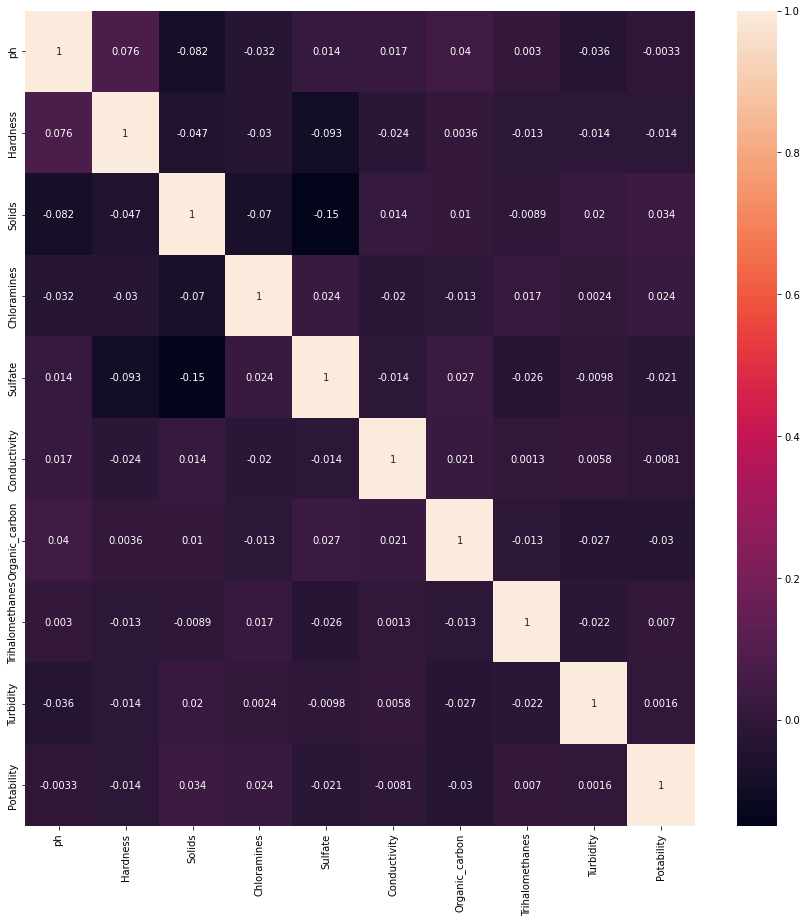

In [123]:
plt.figure(figsize=(15,15))
sns.heatmap(df_water.corr(),annot=True)

In [124]:
# X=np.array(df_water.iloc[:,1:])
# y=np.array(df_water.iloc[:,0])
X=df_water.iloc[:,1:]
y=df_water.iloc[:,0]

In [125]:
X

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [126]:
y

0       7.080795
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

# Feature Selection

In [127]:
model = ExtraTreesRegressor()
feat_imp = model.fit(X,y)

In [128]:
feat_imp.feature_importances_

array([0.15788927, 0.13353025, 0.13334933, 0.13592055, 0.10185571,
       0.10727123, 0.10173808, 0.10596975, 0.02247582])

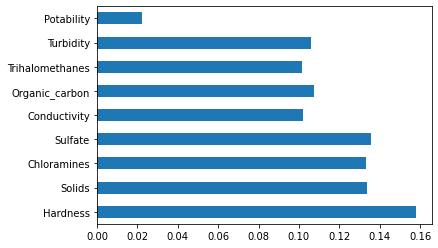

In [129]:
imp = pd.Series(feat_imp.feature_importances_,index=X.columns)
imp.plot(kind='barh')

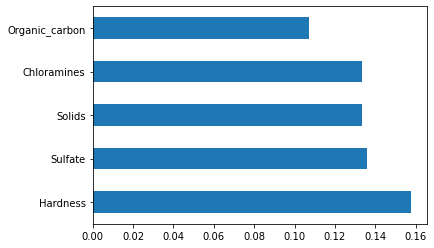

In [130]:
imp = pd.Series(feat_imp.feature_importances_,index=X.columns)
imp.nlargest(5).plot(kind='barh')

#Splitting The Data

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [132]:
X_train

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2128,228.735924,35343.628580,4.346608,333.775777,526.112381,14.930982,46.780508,2.798158,0
1519,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891,1
40,233.858996,11703.923907,4.599388,309.039320,349.399633,18.338893,42.677465,3.510004,0
1151,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537,1
2404,217.372780,25175.754158,9.883946,329.174454,394.054835,20.277571,85.840258,2.615257,1
...,...,...,...,...,...,...,...,...,...
835,183.362713,17259.852302,4.610245,335.626443,452.995293,9.700906,80.537065,2.496343,0
3264,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
1653,191.841801,15176.290678,5.661663,333.775777,471.047129,15.438287,56.532387,3.829784,0
2607,233.300759,23673.100606,8.407497,333.775777,232.613624,18.459408,60.993590,5.040461,0


In [133]:
X_test

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2017,217.266472,38184.469574,7.254122,311.910224,281.069203,13.027921,78.582094,4.430750,1
2533,179.805992,23793.031358,5.332099,333.198191,461.530446,13.557381,60.571241,4.145807,0
589,180.893036,17705.608616,6.223312,350.195253,447.937123,10.461025,32.074863,3.999125,0
482,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956,0
2620,165.467025,30021.257079,8.433097,334.397777,494.154505,16.666613,69.580253,5.192117,0
...,...,...,...,...,...,...,...,...,...
2802,152.094169,24790.724599,6.308730,388.998079,307.918075,12.594197,51.625213,3.695615,1
1120,203.068746,25489.075026,8.175744,413.560378,405.420612,13.283100,74.412867,2.571392,1
601,220.552524,28135.076838,7.978098,307.652451,421.464253,17.532298,86.848098,3.569570,0
2381,170.440921,23000.723137,4.433725,340.645670,346.642267,13.276638,84.551081,3.782517,1


#Model Selection

In [134]:
regressor = RandomForestRegressor()

#Hyper Parameter Tuning

In [135]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

max_features =  ['auto', 'sqrt']

max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]

min_samples_leaf = [1, 2, 5, 10]

In [136]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [137]:
rf_regressor = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5,
                                  verbose = 2,
                                  random_state = 42,
                                  n_jobs = 1)

#Training The Model

In [138]:
rf_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   7.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   7.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   7.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   7.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, n_estimators=700; total time=   7.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=  11.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=  12.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=  11.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=1100; total time=  11.7s
[CV] END max_depth=10, max_features=aut

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [139]:
rf_regressor.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 1100}

#Predicting The Model

In [140]:
y_pred = rf_regressor.predict(X_test)

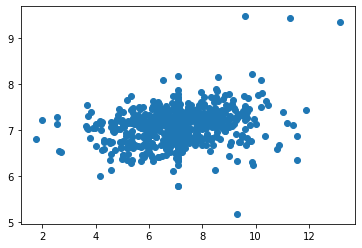

In [141]:
plt.scatter(y_test, y_pred)

In [142]:
finaldf = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [143]:
finaldf

,Actual,Predicted
2017,8.111953,7.100015
2533,6.768060,6.706596
589,7.080795,7.050122
482,7.705711,6.762511
2620,5.830542,6.672074
...,...,...
2802,5.230454,6.480071
1120,7.444914,7.368170
601,7.080795,7.335074
2381,4.945695,6.617878


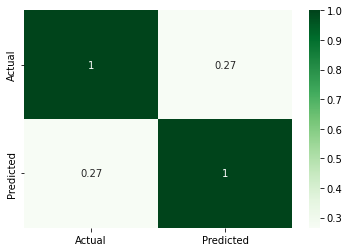

In [144]:
sns.heatmap(finaldf.corr(),annot=True, cmap='Greens')

#Perfomance/Accuracy

In [147]:
r2_score(y_test, y_pred)

0.07047462866991772